In [ ]:
from netrep.metrics import LinearMetric
import numpy as np
import matplotlib.pyplot as plt

def make_line(x_start=0, x_end=1, num_points=500, mulitplier=1.0, c=0):
    '''
    Generates a line from x_start to x_end with n=numpoints.
    The line will be of form y = (multiplier) * x + c
    '''
    x = np.linspace(x_start, x_end, num_points)
    y = mulitplier * x + c

    matrix = np.column_stack((x, y))
    return matrix

def make_1d_polynomial(x_start=-1, x_end=1, num_points=500, coefs=[1, 0, 0]):
    '''
    Generates a 1d polynomial with coefficients in decreasing order of power.

    Arguments:
    Coefficients is a list of numbers for the polynomial function.
    '''
    # Returns a class representing a polynomial function with coefs
    p = np.poly1d(coefs)
    x = np.linspace(x_start, x_end, num_points)
    y = p(x)

    matrix = np.column_stack((x, y))
    return matrix


unit_line = make_line() # X
# Observation: resolution (num_points) affects the distance. 
# Divide by total number of points. 
flipped_unit_line = make_line(mulitplier=-1) # Y
polynomial = make_1d_polynomial()

# higher alpha => more regularlized. alpha = 1 => only rotational alignments.
# alpha = 0, metric ~ CCA
rot_metric = LinearMetric(alpha=1)
lin_metric = LinearMetric(alpha=1)
mixed_metric = LinearMetric(alpha=0.5)



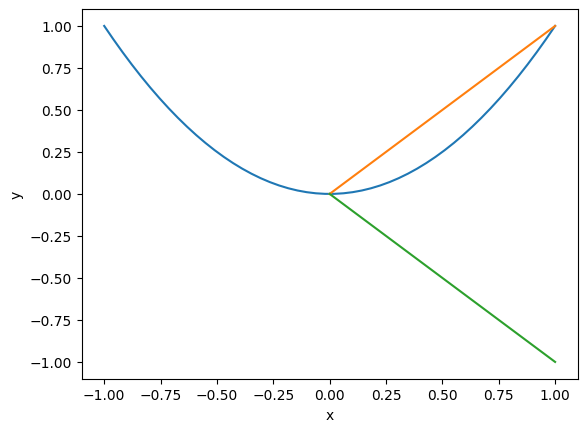

In [42]:

# polynomial is 2d array with [value, x | y]
plt.plot(polynomial[:, 0], polynomial[:, 1])
plt.plot(unit_line[:, 0], unit_line[:, 1])
plt.plot(flipped_unit_line[:, 0], flipped_unit_line[:, 1])
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [ ]:
def pairwise_distances(x, y, funcs=[rot_metric.fit_score, lin_metric.fit_score, mixed_metric.fit_score]):
    distances = []
    for func in funcs:
        distance = func(x, y)
        distances.append(distance)
    return distances

line_to_flipped_distances = pairwise_distances(unit_line, flipped_unit_line)
line_to_line = pairwise_distances(unit_line, unit_line)

line_to_poly = pairwise_distances(unit_line, polynomial)
poly_to_poly = pairwise_distances(polynomial, polynomial)

flipped_line_to_poly = pairwise_distances(flipped_unit_line, polynomial)
flipped_line_to_flipped_line = pairwise_distances(flipped_unit_line, flipped_unit_line)

In [60]:
'''
        line1 line2 line3
line1
line2
line3
'''

table0 = [ 
    ["\t", "Unit Line", "Flipped Line", "Polynomial"],
    ["Unit Line", line_to_line[0], "\t"+str(line_to_flipped_distances[0]), "\t"+str(line_to_poly[0])],
    ["Flipped Line", line_to_flipped_distances[0], "\t"+str(flipped_line_to_flipped_line[0]), "\t"+str(flipped_line_to_poly[0]) ],
    ["Polynomial",line_to_poly[0], flipped_line_to_poly[0] , poly_to_poly[0] ]
 ]

In [61]:

for row in table0:
    for item in row:
        print(item, end="\t") # Use tab for separation
    print() # New line after each row


# 0.4846337509907593

		Unit Line	Flipped Line	Polynomial	
Unit Line	0.0		0.0		0.4846337509907593	
Flipped Line	0.0		0.0		0.4846337509907593	
Polynomial	0.4846337509907593	0.4846337509907593	0.0	
